In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [3]:
df = pd.read_csv("vgsales_new.csv")
df.set_index('Rank', inplace=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16301, 10)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16165 entries, 545 to 5959
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          16165 non-null  object  
 1   Platform      16165 non-null  object  
 2   Year          16165 non-null  int64   
 3   Genre         16165 non-null  object  
 4   Publisher     16165 non-null  object  
 5   NA_Sales      16165 non-null  float64 
 6   EU_Sales      16165 non-null  float64 
 7   JP_Sales      16165 non-null  float64 
 8   Other_Sales   16165 non-null  float64 
 9   Global_Sales  16165 non-null  float64 
 10  Category      16165 non-null  category
dtypes: category(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# Memerika missing values

df.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Category        0
dtype: int64

In [ ]:
# Memeriksa kolom Publisher yang ada missing value

df[df['Publisher'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Category
Rank,,,,,,,,,,,


In [ ]:
# Memutuskan untuk menghapus missing value di kolom publisher

df = df.dropna(subset=['Publisher'])

In [16]:
df = df.sort_values('Year', ascending=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
6319,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
5368,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
...,...,...,...,...,...,...,...,...,...,...
13082,Caligula,PSV,2016,Role-Playing,FuRyu,0.00,0.00,0.05,0.00,0.05
16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03


In [ ]:
# Menghapus Unknown(missing values) dari kolom publisher

df = df[df['Publisher'] != 'Unknown']

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
6319,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
5368,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
...,...,...,...,...,...,...,...,...,...,...
13082,Caligula,PSV,2016,Role-Playing,FuRyu,0.00,0.00,0.05,0.00,0.05
16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03


# Analisis 1: Total Penjualan Game Sebelum vs. Setelah Tahun 2000

Untuk melihat bagaimana evolusi video games dan perubahan model bisnis memengaruhi total penjualan game sebelum dan setelah tahun 2000, akan membutuhkan kolom baru yaitu "Category" yang akan membedakan game sebelum dan setelah tahun 2000.

In [43]:
group_years = [1979, 1999, 2020]
years_label = ['Pre-2000 Games', 'Post-2000 Games']

df['Category'] = pd.cut(df['Year'], bins = group_years, labels = years_label)

Setelah membuat kolom "Category" Year, buat tabel baru untuk visualisasi perbandingan game sebelum dan setelah tahun 2000

In [51]:
sales_category = df.groupby('Category').agg(
    Total_Sales = ('Global_Sales', 'sum'),
    Total_Games = ("Category", 'count'),
    Total_Years = ("Year", "nunique")
).reset_index()

sales_category

C:\Users\rafli\AppData\Local\Temp\ipykernel_16024\1085108465.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_category = df.groupby('Category').agg(


,Category,Total_Sales,Total_Games,Total_Years
0,Pre-2000 Games,1654.37,1972,20
1,Post-2000 Games,7142.47,14193,19


In [52]:
pre_sales, post_sales = sales_category['Total_Sales'].values

In [53]:
selisih = post_sales - pre_sales
selisih

np.float64(5488.1)

## Visualisasi Analisis 1.1 (Perbandingan Rata-rata total sales per tahun)

Rata rata Total Sales per Tahun sebelum 2000 adalah 82.7185
Rata rata Total Sales per Tahun sesudah 2000 adalah 420.1452941176471


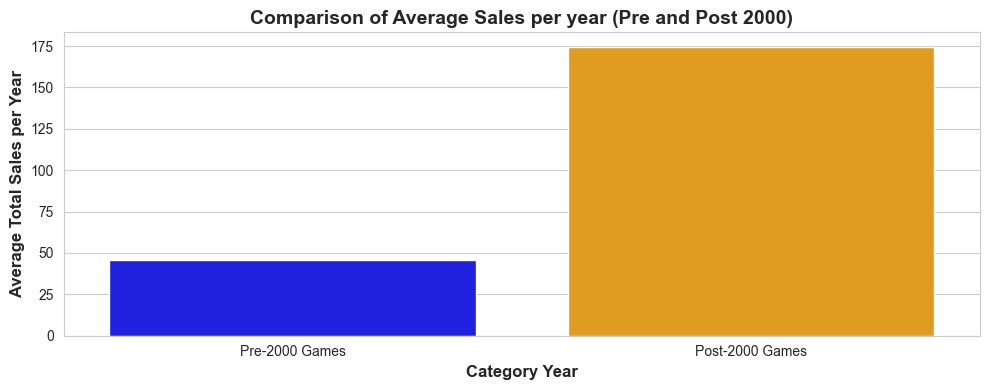

In [54]:
year_per_pre_games = pre_sales / 20
year_per_post_games = post_sales / 17

print("Rata rata Total Sales per Tahun sebelum 2000 adalah", year_per_pre_games)
print("Rata rata Total Sales per Tahun sesudah 2000 adalah", year_per_post_games)


# Visualisasi perbandingan
category = ['Pre-2000 Games', 'Post-2000 Games']
avg_sales_per_year = [45.51, 174.58]

plt.figure(figsize=(10,4))
sns.set_style('whitegrid')
sns.barplot(x = category, 
            y = avg_sales_per_year,
            palette = ['blue', 'orange'],
            hue = category)

plt.title("Comparison of Average Sales per year (Pre and Post 2000)", fontsize = 14, fontweight = 'bold')
plt.xlabel("Category Year", fontsize = 12, fontweight = 'bold')
plt.ylabel("Average Total Sales per Year", fontsize = 12, fontweight = 'bold')

plt.tight_layout()

Dari temuan ini, kita dapat melihat bahwa rata-rata penjualan per tahun untuk game yang dirilis setelah tahun 2000 mencapai **420.14**, jauh lebih tinggi dibandingkan dengan game yang dirilis sebelum tahun 2000, yang hanya memiliki rata-rata **82.70**. Untuk memahami faktor yang mempengaruhi perbedaan ini, mari kita lihat perbandingan total penjualan dan jumlah game yang dirilis pada kedua kategori tersebut.

## Visualisasi Analisis 1.2 (Perbandingan Total Penjualan dan Jumlah Game sebelum dan sesudah tahun 2000)

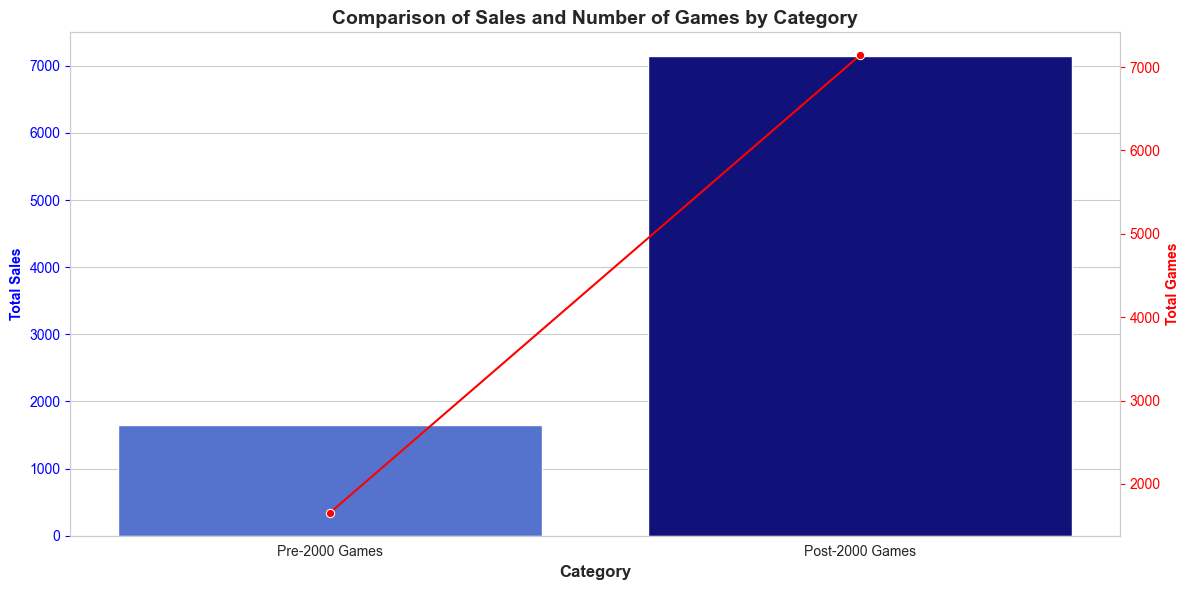

In [55]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1 = sns.barplot(data=sales_category,
            x = 'Category',
            y = 'Total_Sales',
            palette = ['royalblue', 'darkblue'],
            hue = 'Category',
            )

ax2 = plt.twinx()

ax2 = sns.lineplot(data=sales_category,
             x = 'Category',
             y = 'Total_Sales',
             marker = 'o',
             color = 'red',
             )

plt.grid(False) # Menghapus grid yang menghalangi bar chart
plt.title("Comparison of Sales and Number of Games by Category", fontweight = 'bold', fontsize = 14) # Membuat judul chart
ax1.set_xlabel("Category", fontweight = 'bold', fontsize = 12) # Membuat label x  di ax1 dan menamai "Category"
ax1.set_ylabel("Total Sales", color="blue", fontweight="bold") # Membuat label y di ax1 dan menamai "Total Sales"
ax2.set_ylabel("Total Games", color="red", fontweight="bold") # Membuat label y di ax2 dan menamai "Total Games"
ax1.tick_params(axis = 'y', colors = 'blue') # custom warna pada nomor label
ax2.tick_params(axis= 'y', colors = 'red') # custom warna pada nomor label

plt.tight_layout()

Dari Bar chart diatas, kita bisa lihat bahwa Total Sales dan Total Games yang dikeluarkan oleh Games yang dirilis setelah tahun 2000 jauh lebih tinggi dibandingkan dengan Games yang dirilis sebelum tahun 2000. Padahal Kategori Post-2000 Games dengan Pre-2000 Games hanya berbeda 1 tahun. Penemuan ini menjadikan munculnya beberapa pertanyaan mengenai faktor-faktor yang menyebabkan lonjakan drastis ini. Apakah ada platform atau publisher baru yang memiliki kontribusi dominan dalam peningkatan ini?  

# Analisis 2: Top 10 Platform Terbesar Periode 1980-2016

In [56]:
df_post = df[df['Category'] == 'Post-2000 Games']
post_platform = df_post.groupby('Platform')['Global_Sales'].sum().reset_index()
post_platform = post_platform.sort_values('Global_Sales', ascending=False)
post_platform.head()

,Platform,Global_Sales
9,PS2,1230.68
17,X360,968.45
10,PS3,947.70
15,Wii,909.03
2,DS,817.71


In [57]:
df_pre = df[df['Category'] == 'Pre-2000 Games']
pre_platform = df_pre.groupby('Platform')['Global_Sales'].sum().reset_index()
pre_platform = pre_platform.sort_values('Global_Sales', ascending=False)
pre_platform.head()

,Platform,Global_Sales
12,PS,586.02
8,NES,251.07
4,GB,225.42
15,SNES,200.05
7,N64,180.86


In [59]:
new_platforms = post_platform[~post_platform["Platform"].isin(pre_platform["Platform"])]

new_platforms

,Platform,Global_Sales
9,PS2,1230.68
17,X360,968.45
10,PS3,947.70
15,Wii,909.03
4,GBA,304.29
12,PSP,289.49
11,PS4,277.96
18,XB,252.09
0,3DS,245.81
5,GC,197.04


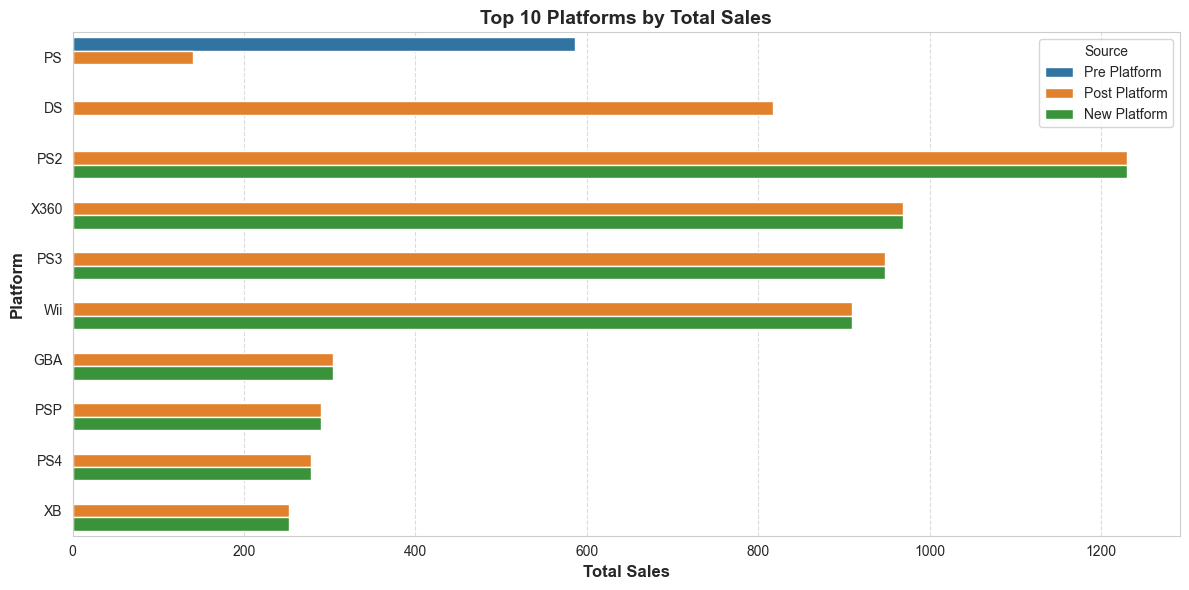

In [61]:
pre_platform = pre_platform.copy()
post_platform = post_platform.copy()
new_platforms = new_platforms.copy()

pre_platform['Source'] = 'Pre Platform'
post_platform['Source'] = 'Post Platform'
new_platforms['Source'] = 'New Platform'

combined_platform = pd.concat([pre_platform, post_platform, new_platforms])

top_platforms = combined_platform.groupby('Platform')['Global_Sales'].sum().nlargest(10).index

filtered_data = combined_platform[combined_platform['Platform'].isin(top_platforms)].copy()

plt.figure(figsize=(12,6))
sns.barplot(data=filtered_data, y='Platform', x='Global_Sales', hue='Source')

plt.ylabel("Platform", fontsize = 12, fontweight = 'bold')
plt.xlabel("Total Sales", fontsize = 12, fontweight = 'bold')
plt.title("Top 10 Platforms by Total Sales", fontsize = 14, fontweight = 'bold')
plt.legend(title="Source")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dari chart diatas, dapat dilihat bahwa Platform yang dirilis setelah tahun 2000 **seperti PS2, X360, dan PS3** mendominasi top 10 Platform berdasarkan Total Penjualan. **PS2, dan PS3** berhasil melanjutkan tren yang positif dari **PS1**, tetapi **PS4** masih kalah dengan PS1 di periode sebelum tahun 2000. Penggemar game tampaknya lebih tertarik bermain di **X360** atau platform sekelas **PS4** daripada menggunakan PS4 itu sendiri. Kesimpulannya adalah Platform terbaru dapat memikat para penggemar game untuk memainkan berbagai jenis games di platform terbaru, baik itu dari segi gameplay nya, atau bisa bermain dengan orang lain(multiplayer)

# Analisis 3: Top 10 Publisher Terbesar periode 1980-2020

In [62]:
# Publisher setelah tahun 2000

post_publisher = df_post.groupby('Publisher')['Global_Sales'].sum().reset_index()
post_publisher = post_publisher.sort_values('Global_Sales', ascending=False)

post_publisher.head(10)

,Publisher,Global_Sales
285,Nintendo,1184.95
108,Electronic Arts,1008.41
15,Activision,677.10
414,Ubisoft,465.19
358,Sony Computer Entertainment,435.55
390,Take-Two Interactive,389.45
386,THQ,320.73
258,Microsoft Game Studios,240.57
218,Konami Digital Entertainment,222.65
351,Sega,222.61


In [63]:
# Publisher sebelum tahun 2000

pre_publisher = df_pre.groupby('Publisher')['Global_Sales'].sum().reset_index()
pre_publisher = pre_publisher.sort_values('Global_Sales', ascending=False)

pre_publisher.head(10)

,Publisher,Global_Sales
133,Nintendo,599.48
166,Sony Computer Entertainment,171.73
53,Electronic Arts,84.98
101,Konami Digital Entertainment,55.91
127,Namco Bandai Games,49.32
170,SquareSoft,48.60
161,Sega,48.09
22,Atari,45.06
34,Capcom,44.52
9,Activision,44.31


In [64]:
# Publisher baru di tahun > 2000

new_publisher = post_publisher[~post_publisher["Publisher"].isin(pre_publisher["Publisher"])]

new_publisher.head(10)

,Publisher,Global_Sales
366,Square Enix,144.73
433,Warner Bros. Interactive Entertainment,142.34
50,Bethesda Softworks,81.53
5,505 Games,55.91
92,Deep Silver,25.59
360,Sony Computer Entertainment Europe,23.89
233,MTV Games,18.86
416,Universal Interactive,17.60
340,Rising Star Games,17.27
236,Majesco Entertainment,15.81


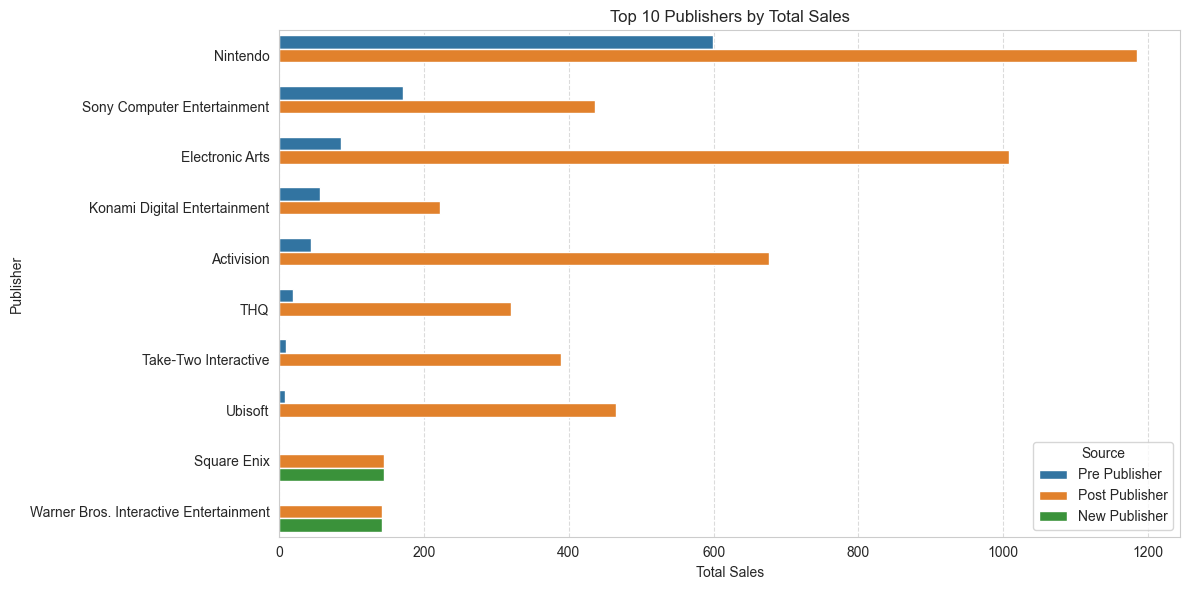

In [66]:
pre_publisher = pre_publisher.copy()
post_publisher = post_publisher.copy()
new_publisher = new_publisher.copy()

pre_publisher['Source'] = 'Pre Publisher'
post_publisher['Source'] = 'Post Publisher'
new_publisher['Source'] = 'New Publisher'

combined_publisher = pd.concat([pre_publisher, post_publisher, new_publisher])

top_publishers = combined_publisher.groupby('Publisher')['Global_Sales'].sum().nlargest(10).index

filtered_data = combined_publisher[combined_publisher['Publisher'].isin(top_publishers)]

plt.figure(figsize=(12,6))
sns.barplot(data=filtered_data, y='Publisher', x='Global_Sales', hue='Source')

plt.ylabel("Publisher")
plt.xlabel("Total Sales")
plt.title("Top 10 Publishers by Total Sales")
plt.legend(title="Source")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Chart di atas menunjukkan bahwa **Nintendo** mendominasi penjualan game dari tahun 1980 hingga 2020, membuktikan kemampuannya dalam menciptakan game yang terus relevan dengan perkembangan zaman. Sementara itu, publisher besar lainnya seperti **Electronic Arts, Activision, dan Ubisoft** juga mencatat angka penjualan yang tinggi, dengan kontribusi utama dari periode **Post Publisher**. Beberapa publisher baru yang muncul setelah tahun 2000, seperti **Square Enix, dan Warner Bros**, berhasil masuk ke dalam daftar top publisher. Namun, pertumbuhan mereka masih belum sebesar Nintendo dan Electronic Arts, menunjukkan bahwa industri game tetap didominasi oleh pemain lama yang telah mengakar kuat di pasar.

# Analisis 4: Analisis Penjualan Nintendo Periode 1980-2016

Analisis ini akan melihat bagaimana Tren penjualan Game publisher Nintendo dari tahun ke tahun

In [67]:
top_publisher = df.groupby('Publisher')['Global_Sales'].sum().reset_index()
top_publisher.sort_values('Global_Sales', ascending=False, inplace=True)
top_publisher.head()

,Publisher,Global_Sales
359,Nintendo,1784.43
138,Electronic Arts,1093.39
21,Activision,721.41
455,Sony Computer Entertainment,607.28
524,Ubisoft,473.54


In [73]:
nintendo = df[df['Publisher'] == 'Nintendo']
nintendo = nintendo.groupby('Year')['Global_Sales'].sum().reset_index()
nintendo.sort_values('Global_Sales', ascending=False, inplace=True)
nintendo.head()

,Year,Global_Sales
23,2006,205.61
26,2009,128.89
22,2005,127.47
24,2007,104.18
25,2008,91.22


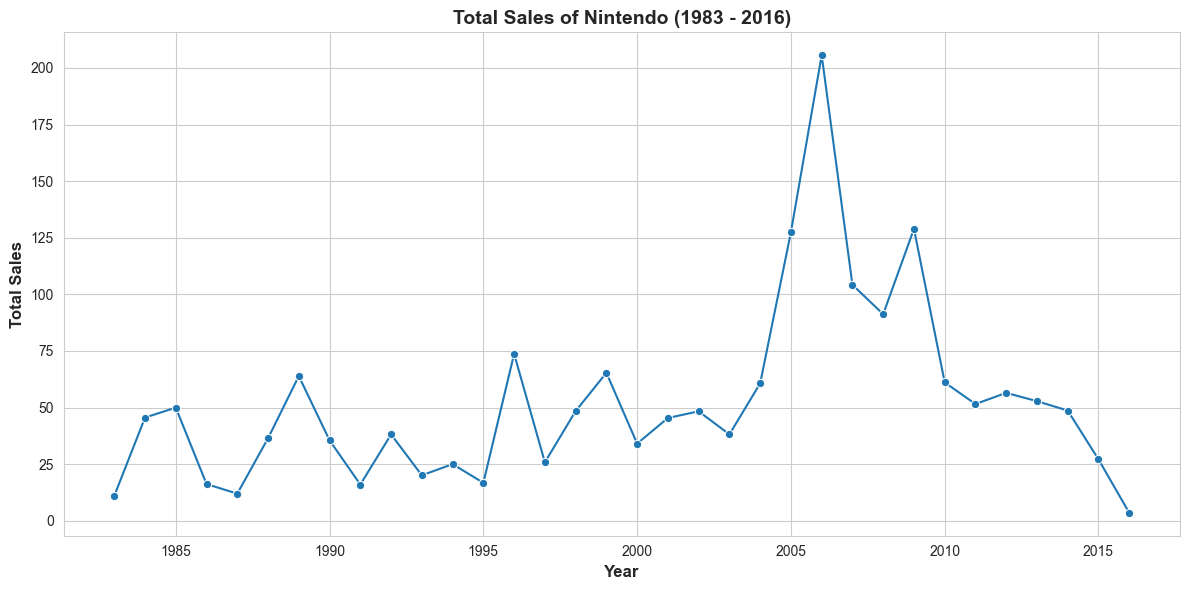

In [75]:
plt.figure(figsize=(12,6))

sns.lineplot(data = nintendo,
             x = 'Year',
             y = 'Global_Sales',
             marker = 'o')

plt.title("Total Sales of Nintendo (1983 - 2016)", fontsize = 14, fontweight = 'bold')
plt.xlabel("Year", fontsize = 12, fontweight = 'bold')
plt.ylabel("Total Sales", fontsize = 12, fontweight = 'bold')

plt.tight_layout()

Berdasarkan line chart di atas, tahun 2006 menjadi puncak penjualan bagi publisher Nintendo, dengan lonjakan signifikan dibanding tahun-tahun sebelumnya. Setelah mencapai titik tertinggi, penjualan mulai menurun, kemungkinan dipengaruhi oleh perubahan tren pasar, siklus hidup produk, serta munculnya persaingan dari platform lain. Meskipun begitu, tahun tersebut tetap menjadi momen penting dalam sejarah Nintendo, menandakan periode di mana mereka berhasil menarik perhatian pasar secara besar-besaran.

# Analisis 5: Top 10 Game Nintendo pada Tahun 2006  

Untuk memahami alasan di balik pencapaian penjualan terbesar Nintendo pada game yang dirilis pada tahun 2006, analisis ini akan menelusuri game apa saja yang berkontribusi terhadap lonjakan tersebut.

In [78]:
nintendo_2006 = df[(df['Publisher'] == 'Nintendo') & (df['Year'] == 2006)]
nintendo_2006 = nintendo_2006.sort_values('Global_Sales', ascending=False)

nintendo_2006 = nintendo_2006.head(10)

C:\Users\rafli\AppData\Local\Temp\ipykernel_16024\332282508.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(nintendo_2006))


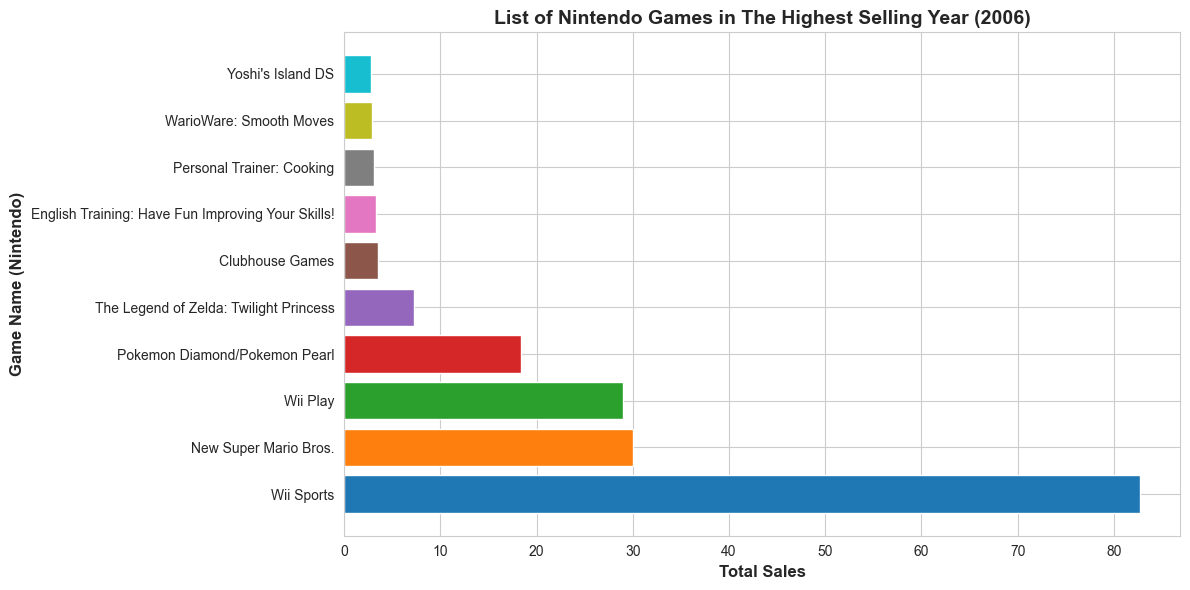

In [79]:
plt.figure(figsize=(12,6))

colors = plt.cm.get_cmap('tab10', len(nintendo_2006))

plt.barh(nintendo_2006['Name'], nintendo_2006['Global_Sales'], color=[colors(i) for i in range(len(nintendo_2006))])

plt.title("List of Nintendo Games in The Highest Selling Year (2006)", fontsize = 14, fontweight = 'bold')
plt.xlabel("Total Sales", fontsize = 12, fontweight = 'bold')
plt.ylabel("Game Name (Nintendo)", fontsize = 12, fontweight = 'bold')
plt.tight_layout()

In [80]:
nintendo_2006

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Category
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Post-2000 Games
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Post-2000 Games
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Post-2000 Games
21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,Post-2000 Games
101,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.31,Post-2000 Games
377,Clubhouse Games,DS,2006,Misc,Nintendo,0.59,1.83,0.73,0.35,3.50,Post-2000 Games
403,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,Nintendo,0.00,0.99,2.32,0.02,3.33,Post-2000 Games
445,Personal Trainer: Cooking,DS,2006,Misc,Nintendo,0.91,1.00,1.03,0.17,3.12,Post-2000 Games
491,WarioWare: Smooth Moves,Wii,2006,Puzzle,Nintendo,0.87,1.06,0.73,0.26,2.92,Post-2000 Games


**Wii Sports** menjadi game terlaris dengan penjualan **82.74** juta unit, jauh melampaui game nintendo yang kedua yaitu **New Super Mario Bros**. **Wii Play** masing-masing terjual sebanyak **29.02** juta unit. **Pokemon Diamond/Pearl** juga menunjukkan performa yang baik dengan penjualan **18.36** juta unit, diikuti oleh **The Legend of Zelda: Twilight Princess**. Game-game pendidikan dan kasual seperti **Clubhouse Games dan English Training: Have Fun Improving Your Skills!** turut memperkuat lineup Nintendo, meskipun dengan penjualan yang lebih rendah. Dominasi **Wii Sports** menandakan kesuksesan strategi Nintendo dalam menarik audience kasual melalui konsol Wii yang inovatif dengan kontrol gerakan.

# Analisis 6: Rata-Rata Penjualan Game Bedasarkan Genre

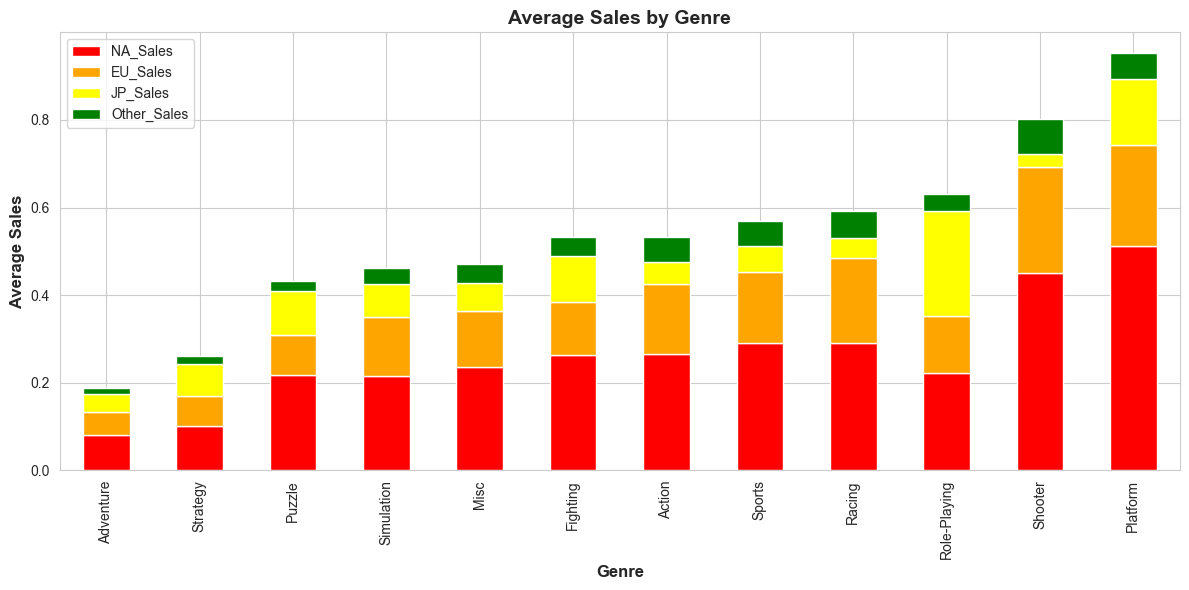

In [ ]:
average_genre = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
average_genre['Total_Average'] = average_genre[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
average_genre.sort_values('Total_Average', ascending=True, inplace=True)

average_genre[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].plot(kind = 'bar', 
           stacked=True,
           figsize= (12,6),
           color=['red', 'orange', 'yellow', 'green'])

plt.title("Average Sales by Genre", fontsize = 14, fontweight = 'bold')
plt.xlabel("Genre", fontsize = 12, fontweight = 'bold')
plt.ylabel("Average Sales", fontsize = 12, fontweight = 'bold')

plt.tight_layout()

Berdasarkan grafik diatas, Genre **Platform** menjadi Genre dengan rata-rata penjualan tertinggi sebesar 952,299 unit per gamenya, diikuti oleh genre **Shooter dan Role-Playing**. Dari ketiga genre dengan rata-rata penjualan tertinggi ini, terlihat bahwa penggemar game lebih menyukai game dengan gameplay yang membutuhkan fokus tinggi namun tetap menyenangkan seperti yang ditawarkan oleh game-game **platform, shooter, dan role-playing**. Gameplay yang menantang dengan sistem progresi yang jelas dan kebebasan eksplorasi pada ketiga genre ini berhasil menarik perhatian para pemain.

Berikut merupakan daftar game dari top 3 genre dengan rata-rata penjualan tertinggi:

In [85]:
top_game_average = df[df['Genre'].isin(['Platform', 'Shooter', 'Role-Playing'])]

top_game_average

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Category
Rank,,,,,,,,,,,
545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76,Pre-2000 Games
259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31,Pre-2000 Games
2808,Berzerk,2600,1981,Shooter,Atari,0.68,0.04,0.00,0.01,0.73,Pre-2000 Games
1967,Cosmic Ark,2600,1981,Shooter,Imagic,0.99,0.05,0.00,0.01,1.05,Pre-2000 Games
6942,Dark Cavern,2600,1981,Shooter,Mattel Interactive,0.22,0.01,0.00,0.00,0.24,Pre-2000 Games
...,...,...,...,...,...,...,...,...,...,...,...
6089,World of Warcraft: Legion,PC,2016,Role-Playing,Activision,0.14,0.12,0.00,0.02,0.29,Post-2000 Games
2993,Doom (2016),XOne,2016,Shooter,Bethesda Softworks,0.39,0.23,0.00,0.06,0.68,Post-2000 Games
13082,Caligula,PSV,2016,Role-Playing,FuRyu,0.00,0.00,0.05,0.00,0.05,Post-2000 Games


# Analisis 7: Total Penjualan Game Bedasarkan Genre Dilihat Dari Region North America, Europe, Japan

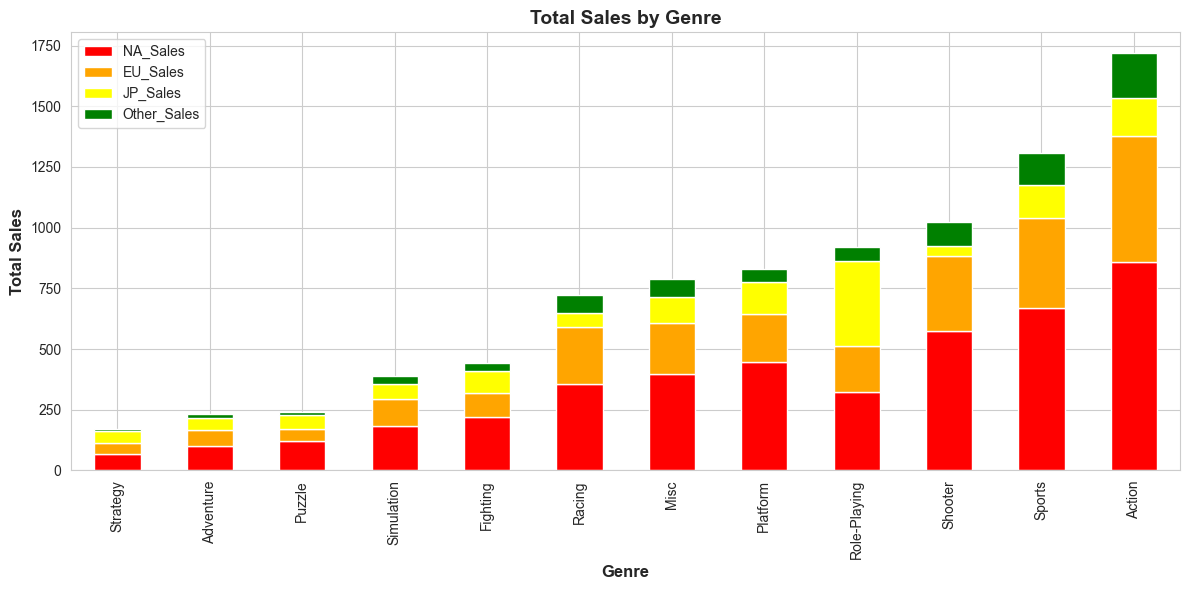

In [88]:
sum_genre = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
sum_genre['Total_Sales'] = sum_genre[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum(axis=1)
sum_genre.sort_values('Total_Sales', ascending=True, inplace=True)

sum_genre[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].plot(kind = 'bar', 
           stacked=True,
           figsize= (12,6),
           color=['red', 'orange', 'yellow','green'])

plt.title("Total Sales by Genre", fontsize = 14, fontweight = 'bold')
plt.xlabel("Genre", fontsize = 12, fontweight = 'bold')
plt.ylabel("Total Sales", fontsize = 12, fontweight = 'bold')

plt.tight_layout()

Jika dilihat dari total penjualan berdasarkan genre, genre **Action** menjadi genre game yang paling banyak terjual, diikuti oleh genre **Sports** yang menjadi genre paling banyak terjual kedua. Genre **Platform** yang sebelumnya memiliki rata-rata penjualan tertinggi per game, berada di posisi 8 dalam total penjualan secara keseluruhan. Data ini menunjukkan bahwa meskipun game **Platform** memiliki performa penjualan rata-rata lebih tinggi per game, jumlah game **Action** yang dirilis lebih banyak sehingga mendominasi total penjualan.

# Analisis Penjualan Game berdasarkan Genre dan Region

Berdasarkan kedua grafik, terlihat pola penjualan yang berbeda antara rata-rata penjualan per game dan total penjualan keseluruhan.

**Total Sales vs Average Sales:**
- Genre **Action** memimpin dalam total penjualan, tetapi dari segi rata-rata penjualan per game, genre **Platform** menunjukkan performa terbaik.
- Genre **Sports** menempati posisi kedua dalam total penjualan, namun hanya berada di peringkat menengah untuk rata-rata penjualan per game.
- **Shooter** konsisten berada di peringkat atas untuk keduanya, menunjukkan popularitas yang tinggi dengan jumlah game yang relatif seimbang.

**Distribusi Regional:**
- **North America (NA)** mendominasi hampir semua genre dengan kontribusi penjualan tertinggi, terutama untuk genre Action, Shooter, dan Sports.
- **Europe (EU)** menunjukkan minat yang cukup konsisten di berbagai genre dengan preferensi lebih tinggi pada genre Racing dan Sports.
- **Japan (JP)** memiliki preferensi unik dengan kontribusi signifikan pada genre Role-Playing, namun menunjukkan minat yang jauh lebih rendah pada genre Shooter.

Perbedaan preferensi regional ini mencerminkan keragaman budaya gaming di ketiga wilayah:
- Region **North America** lebih menyukai game berorientasi aksi dan kompetisi
- Region **Europe** memiliki selera yang lebih seimbang di berbagai genre
- **Japan** lebih condong pada game dengan cerita kompleks dan pengembangan karakter seperti yang umum ditemukan dalam game Role-Playing

Menariknya, meskipun genre seperti Strategy dan Adventure memiliki total penjualan rendah, hal ini mungkin lebih disebabkan oleh jumlah game yang lebih sedikit dalam kategori tersebut, bukan karena kurangnya minat pasar.

# Analisis 8: Distribusi Penjualan Game 

#### Menemukan tahun dengan Total Penjualan terbanyak

In [91]:
top_year_sales = df.groupby('Year')['Global_Sales'].sum().reset_index()
top_year_sales.sort_values('Global_Sales', ascending=False, inplace=True)
top_year_sales.head()

,Year,Global_Sales
28,2008,678.58
29,2009,667.18
27,2007,609.66
30,2010,598.44
26,2006,520.92


Tahun dengan total penjualan tertinggi adalah tahun 2008

In [93]:
sales_2008 = df[df['Year'] == 2008]
sales_2008 = sales_2008.sort_values('Global_Sales', ascending=False)

sales_2008.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Category
Rank,,,,,,,,,,,
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Post-2000 Games
40,Super Smash Bros. Brawl,Wii,2008,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04,Post-2000 Games
52,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02,Post-2000 Games
57,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57,Post-2000 Games
89,PokÃ©mon Platinum Version,DS,2008,Role-Playing,Nintendo,2.82,1.78,2.69,0.55,7.84,Post-2000 Games


#### Menemukan tahun dengan Total Game terbanyak

In [94]:
game_per_year = df.groupby('Year').size().reset_index(name='Total_Games').sort_values('Total_Games', ascending=False)
game_per_year.head()

,Year,Total_Games
29,2009,1428
28,2008,1426
30,2010,1237
27,2007,1197
31,2011,1091


Tahun dengan total game rilis terbanyak adalah tahun 2009

In [95]:
sales_2009 = df[df['Year'] == 2009].sort_values('Global_Sales', ascending=False)
sales_2009.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Category
Rank,,,,,,,,,,,
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Post-2000 Games
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,Post-2000 Games
15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,Post-2000 Games
37,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,8.52,3.63,0.08,1.29,13.51,Post-2000 Games
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90,Post-2000 Games


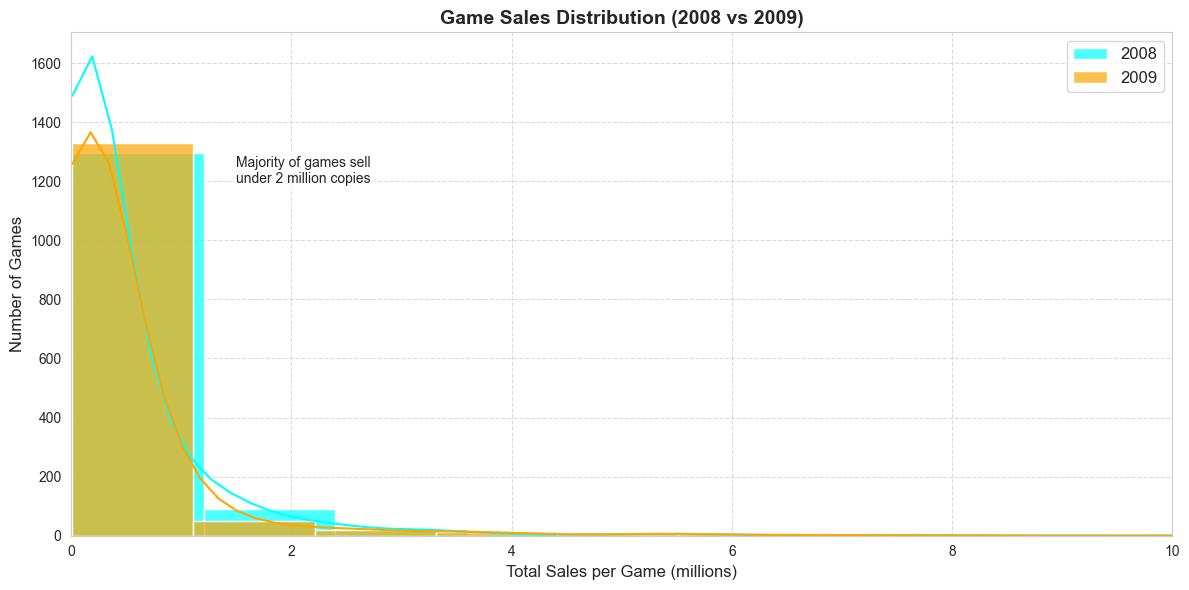

In [97]:
plt.figure(figsize=(12, 6))

# Perbaikan 1: Batasi range sumbu x untuk fokus pada distribusi utama
plt.xlim(0, 10)  # Batasi sumbu x hingga 10 unit penjualan untuk detail lebih baik

# Perbaikan 2: Gunakan alpha untuk transparansi yang lebih baik pada overlap
sns.histplot(sales_2008['Global_Sales'], bins=30, color='cyan', label='2008', 
             kde=True, line_kws={'color':'blue'}, alpha=0.7)
sns.histplot(sales_2009['Global_Sales'], bins=30, color='orange', label='2009', 
             kde=True, line_kws={'color':'darkorange'}, alpha=0.7)

# Judul dan Label dengan ukuran lebih besar
plt.xlabel('Total Sales per Game (millions)', fontsize=12)  # Tambahkan satuan untuk kejelasan
plt.ylabel('Number of Games', fontsize=12)
plt.title('Game Sales Distribution (2008 vs 2009)', fontsize=14, fontweight='bold')

# Tambahkan grid dan legend dengan posisi yang lebih baik
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper right')  # Tentukan lokasi legend

# Tambahkan anotasi untuk menjelaskan distribusi
plt.annotate('Majority of games sell\nunder 2 million copies', 
             xy=(1.5, plt.gca().get_ylim()[1]*0.7), 
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))

plt.tight_layout()

Berdasarkan histogram perbandingan distribusi penjualan game antara tahun 2008 dan 2009, terlihat bahwa mayoritas game pada kedua tahun memiliki penjualan di bawah 2 juta unit, namun dengan perbedaan pola distribusi yang menarik: tahun 2008 (warna cyan) menunjukkan puncak yang lebih tinggi pada penjualan sangat rendah (0-0.5 juta unit) dengan kurva KDE yang lebih tinggi, sementara distribusi tahun 2009 (warna oranye) terlihat lebih merata pada rentang 0-2 juta unit, yang mungkin mengindikasikan sedikit pergeseran industri ke arah penjualan yang lebih baik meskipun kedua tahun tetap menunjukkan karakteristik distribusi ekor panjang (long-tail) yang khas dalam industri video game di mana hanya sedikit judul yang mencapai penjualan tinggi.